# Import Required Libraries
Import the necessary libraries, including NumPy and Matplotlib.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Define Constants
Define the constants used in the Schmidt-Appleman Criterion, such as EIH2O, cp, ε, Q, and η.

In [2]:
# Define Constants
EIH2O = 1.2232  # Emission index (kg H2O / kg fuel)
cp = 1004  # Specific heat capacity of air (J / kg K)
ε = 0.622  # Ratio of molar mass of water vapor to air
Q = 43e6  # Specific combustion heat (J / kg)
η = 0.4  # Overall propulsion efficiency

# Calculate Isobaric Mixing Line (G)
Calculate the isobaric mixing line (G) using the given formula.

In [3]:
# Calculate Isobaric Mixing Line (G)
def calculate_isobaric_mixing_line(EIH2O, cp, ε, Q, η, p):
    """
    Calculate the isobaric mixing line (G) using the given formula.
    
    Parameters:
    EIH2O (float): Emission index (kg H2O / kg fuel)
    cp (float): Specific heat capacity of air (J / kg K)
    ε (float): Ratio of molar mass of water vapor to air
    Q (float): Specific combustion heat (J / kg)
    η (float): Overall propulsion efficiency
    p (float): Ambient pressure (Pa)
    
    Returns:
    float: Isobaric mixing line (G)
    """
    G = (EIH2O * cp * p) / (ε * Q * (1 - η))
    return G

# Example usage
p = 23600  # Ambient pressure at flight level (Pa)
G = calculate_isobaric_mixing_line(EIH2O, cp, ε, Q, η, p)
print(f"Isobaric Mixing Line (G): {G}")

Isobaric Mixing Line (G): 1.8060638400757747


# Calculate Saturation Vapor Pressure over Water
Calculate the saturation vapor pressure over water using the Goff-Gratch equation.

In [4]:
# Calculate Saturation Vapor Pressure over Water
def saturation_vapor_pressure_water(T):
    """
    Calculate the saturation vapor pressure over water using the Goff-Gratch equation.
    
    Parameters:
    T (float): Temperature (K)
    
    Returns:
    float: Saturation vapor pressure over water (Pa)
    """
    Tst = 372.15  # Steam point temperature (K)
    log_e_star_water = (-7.90298 * (Tst / T - 1) + 
                        5.02808 * np.log10(Tst / T) - 
                        1.3816e-7 * (10**(11.344 * (1 - T / Tst)) - 1) + 
                        8.1328e-3 * (10**(-3.49149 * (Tst / T - 1)) - 1))
    e_star_water = 10**log_e_star_water
    return e_star_water

# Example usage
T = 273.15  # Example temperature (K)
e_star_water = saturation_vapor_pressure_water(T)
print(f"Saturation Vapor Pressure over Water: {e_star_water} Pa")

Saturation Vapor Pressure over Water: 0.006355920707490656 Pa


# Calculate Saturation Vapor Pressure over Ice
Calculate the saturation vapor pressure over ice using the given formula.

In [5]:
def saturation_vapor_pressure_ice(T):
    """
    Calculate the saturation vapor pressure over ice using the given formula.
    
    Parameters:
    T (float): Temperature (K)
    
    Returns:
    float: Saturation vapor pressure over ice (Pa)
    """
    T0 = 273.16  # Ice-point temperature (K)
    log_e_star_ice = (-9.09718 * (T0 / T - 1) + 
                      3.56654 * np.log10(T0 / T) + 
                      0.876793 * (1 - T / T0))
    e_star_ice = 10**log_e_star_ice
    return e_star_ice

# Example usage
T = 253.15  # Example temperature (K)
e_star_ice = saturation_vapor_pressure_ice(T)
print(f"Saturation Vapor Pressure over Ice: {e_star_ice} Pa")

Saturation Vapor Pressure over Ice: 0.29039291578786747 Pa


# Determine Temperature TLM
Determine the temperature TLM using the given formula.

In [ ]:
# Determine Temperature TLM
def calculate_TLM(G):
    """
    Calculate the temperature TLM using the given formula.
    
    Parameters:
    G (float): Isobaric mixing line
    
    Returns:
    float: Temperature TLM (K)
    """
    TLM = -46.46 + 9.43 * np.log(G - 0.053) + 0.720 * (np.log(G - 0.053))**2
    return TLM + 273.13

# Example usage
TLM = calculate_TLM(G)
print(f"Temperature TLM: {TLM} K")

Temperature TLM: 232.19056626186895 K


# Determine Threshold Temperature TLC
Determine the threshold temperature TLC by finding the intersection of the mixing line and the saturation vapor pressure curve over ice.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

def determine_threshold_temperature_TLC(G): 
    # Define the mixing line function based on G and TLM
    def mixing_line(T, G, TLM):
        e_star_water_TLM = saturation_vapor_pressure_water(TLM)
        return e_star_water_TLM + (T - TLM) * (G)

    TLM = calculate_TLM(G)

    # Define a range of temperatures around TLM for plotting
    temperature_range = np.linspace(TLM - 150, TLM + 50, 500)  # Kelvin

    # Define the function for finding the intersection point
    def func(T):
        return saturation_vapor_pressure_ice(T) - mixing_line(T, G, TLM)

    # Set up a bracket for the root finding based on the expected range around TLM
    bracket_start = max(TLM - 50, 0.1)
    bracket_end = max(TLM + 50, 0.1)

    # Use root_scalar to find the intersection point
    result = root_scalar(func, bracket=[bracket_start, bracket_end], method='brentq')

    if result.converged:
        TLC = result.root
        print(f"Intersection point found at TLC: {TLC} K")

        # Plot the functions and the intersection point
        temperature_range = np.linspace(TLM - 50, TLM + 50, 500)
        mixing_line_values = [mixing_line(T, G, TLM) for T in temperature_range]
        saturation_vapor_ice_values = [saturation_vapor_pressure_ice(T) for T in temperature_range]

        # plt.figure(figsize=(10, 6))
        # plt.plot(temperature_range, mixing_line_values, label="Mixing Line", color="blue")
        # plt.plot(temperature_range, saturation_vapor_ice_values, label="Saturation Vapor Pressure (Ice)", color="orange")
        # plt.plot(TLC, saturation_vapor_pressure_ice(TLC), 'ro', label=f"Intersection (TLC = {TLC:.2f} K)")
        # plt.xlabel("Temperature (K)")
        # plt.ylabel("Pressure (hPa)")
        # plt.title("Mixing Line vs. Saturation Vapor Pressure over Ice")
        # plt.legend()
        # plt.grid(True)
        # plt.show()
    else:
        print("No intersection found; root finding did not converge.")

    return TLC

determine_threshold_temperature_TLC(G)

Intersection point found at TLC: 219.58275265329644 K


219.58275265329644

# Plot Schmidt-Appleman Diagram
Plot the Schmidt-Appleman Diagram showing the threshold temperatures for a range of altitudes and relative humidities.

Intersection point found at TLC: 241.3860016926111 K
Intersection point found at TLC: 241.22933700614814 K
Intersection point found at TLC: 241.07251158153588 K
Intersection point found at TLC: 240.91552497157645 K
Intersection point found at TLC: 240.75837672404174 K
Intersection point found at TLC: 240.60106638154758 K
Intersection point found at TLC: 240.443593481424 K
Intersection point found at TLC: 240.2859575555818 K
Intersection point found at TLC: 240.1281581303751 K
Intersection point found at TLC: 239.97019472646008 K
Intersection point found at TLC: 239.81206685864922 K
Intersection point found at TLC: 239.65377403576144 K
Intersection point found at TLC: 239.4953157604679 K
Intersection point found at TLC: 239.3366915291328 K
Intersection point found at TLC: 239.17790083165 K
Intersection point found at TLC: 239.0189431512741 K
Intersection point found at TLC: 238.8598179644472 K
Intersection point found at TLC: 238.70052474061976 K
Intersection point found at TLC: 238.541

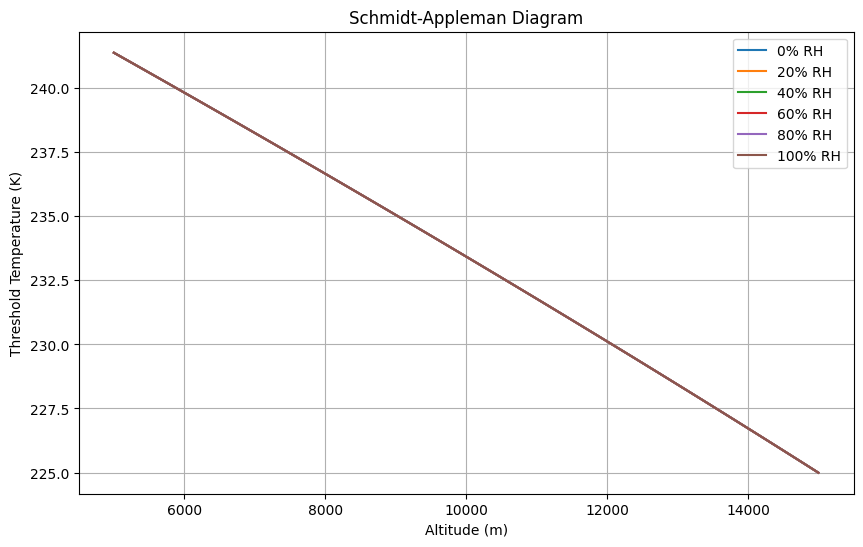

In [20]:
# Plot Schmidt-Appleman Diagram
def plot_schmidt_appleman_diagram():
    """
    Plot the Schmidt-Appleman Diagram showing the threshold temperatures for a range of altitudes and relative humidities.
    """
    altitudes = np.linspace(5000, 15000, 100)  # Altitudes in meters
    relative_humidities = [0,20,40,60,80,100]  # Relative humidities in percentage

    plt.figure(figsize=(10, 6))

    for rh in relative_humidities:
        TLC_values = []
        for altitude in altitudes:
            p = 101325 * (1 - 2.25577e-5 * altitude)**5.25588  # Calculate pressure at altitude
            G = calculate_isobaric_mixing_line(EIH2O, cp, ε, Q, η, p)
            TLC = determine_threshold_temperature_TLC(G)
            TLC_values.append(TLC)
        
        plt.plot(altitudes, TLC_values, label=f'{rh}% RH')

    plt.xlabel('Altitude (m)')
    plt.ylabel('Threshold Temperature (K)')
    plt.title('Schmidt-Appleman Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_schmidt_appleman_diagram()